In [23]:
import pandas as pd

In [24]:
data = pd.read_csv('Data.csv')

In [25]:
df = pd.DataFrame(data)

In [26]:
print(df.head())
print(df.columns)

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [27]:
import folium
from folium.plugins import MarkerCluster

In [28]:
map_centre = [df['Latitude'].mean(), df['Longitude'].mean()]
m = folium.Map(location=map_centre, zoom_start=4)

marker_cluster = MarkerCluster().add_to(m)
for i, row in df.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=row['City']
    ).add_to(marker_cluster)

m.save('restaurant_map.html')

In [29]:
city_counts = df['City'].value_counts()
print(city_counts)

City
New Delhi         5473
Gurgaon           1118
Noida             1080
Faridabad          251
Ghaziabad           25
                  ... 
Lakes Entrance       1
Mohali               1
Panchkula            1
Bandung              1
Randburg             1
Name: count, Length: 141, dtype: int64


In [30]:
city_avg_rating = df.groupby('City')['Aggregate rating'].mean().sort_values(ascending=False)
print(city_avg_rating)

City
Inner City          4.900000
Quezon City         4.800000
Makati City         4.650000
Pasig City          4.633333
Mandaluyong City    4.625000
                      ...   
New Delhi           2.438845
Montville           2.400000
Mc Millan           2.400000
Noida               2.036204
Faridabad           1.866932
Name: Aggregate rating, Length: 141, dtype: float64


In [31]:
import matplotlib.pyplot as plt

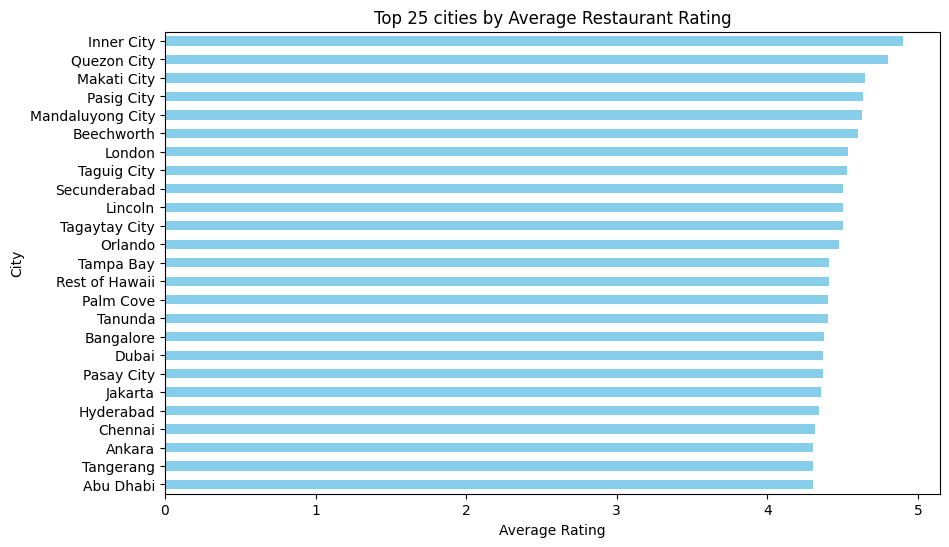

In [32]:
city_avg_rating.head(25).plot(kind='barh', figsize=(10,6), color='skyblue')
plt.xlabel('Average Rating')
plt.title('Top 25 cities by Average Restaurant Rating')
plt.gca().invert_yaxis()
plt.show()

In [33]:
city_avg_price = df.groupby('City')['Price range'].mean().sort_values(ascending=False)
print(city_avg_price)

City
Panchkula           4.0
Vineland Station    4.0
Paynesville         4.0
Johannesburg        4.0
Inner City          4.0
                   ... 
Fernley             1.0
Dicky Beach         1.0
Miller              1.0
Mc Millan           1.0
Vernonia            1.0
Name: Price range, Length: 141, dtype: float64


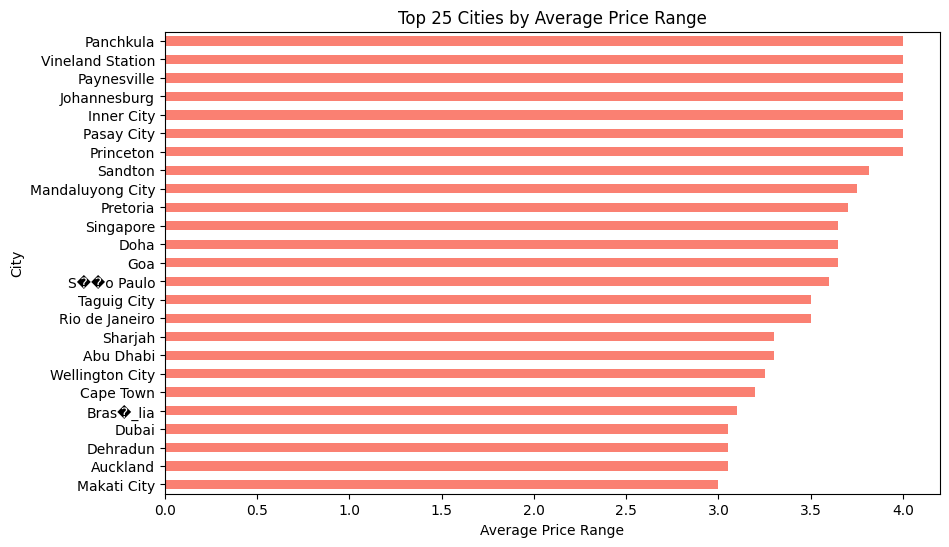

In [34]:
city_avg_price.head(25).plot(kind='barh', figsize=(10,6), color='salmon')
plt.xlabel('Average Price Range')
plt.title('Top 25 Cities by Average Price Range')
plt.gca().invert_yaxis()
plt.show()

In [37]:
df_cuisine = df.dropna(subset=['Cuisines']).copy()

df_cuisine['Primary Cuisine'] = df_cuisine['Cuisines'].apply(lambda x: x.split(',')[0])

top_cuisine_per_city = df_cuisine.groupby('City')['Primary Cuisine'] \
                                 .agg(lambda x: x.value_counts().index[0])


In [38]:
top_cuisine_per_city.head(10)


,Primary Cuisine
City,
Abu Dhabi,Indian
Agra,North Indian
Ahmedabad,North Indian
Albany,American
Allahabad,North Indian
Amritsar,North Indian
Ankara,Kebab
Armidale,Bar Food
Athens,American
